In [ ]:
from google.colab import drive
import os


drive.mount('/content/drive')
print("Google Drive mounted successfully!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings


plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')


%matplotlib inline


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
dataset_filename = 'traffic.csv'

try:
    # First, let's try the filename directly
    df = pd.read_csv(dataset_filename)
    print(f"✓ Dataset loaded successfully from current directory!")

except FileNotFoundError:
    # If not found, let's try to locate the file in the notebook's directory
    print("Trying to locate the file in Colab's working directory...")

    # Find the path where the notebook is located in Google Colab
    # NOTE: This method only works if the notebook is opened from a Drive folder
    try:
        # Get the current working directory
        current_dir = os.getcwd()
        print(f"Current working directory: {current_dir}")

        # If the dataset is in a different subfolder, you can add it here
        # Example: dataset_path = os.path.join(current_dir, 'data', dataset_filename)
        dataset_path = os.path.join(current_dir, dataset_filename)

        df = pd.read_csv(dataset_path)
        print(f"✓ Dataset loaded from: {dataset_path}")

    except Exception as e:
        print(f"Could not load dataset. Error: {e}")
        print("\nPlease ensure:")
        print("1. The notebook and dataset are in the same folder")
        print("2. The dataset filename is correct: 'traffic.csv'")
        print("3. The shared folder is accessible to all team members")
        raise

print(f"Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns")

✓ Dataset loaded successfully from current directory!
Dataset shape: 48120 rows and 4 columns


In [ ]:
print("\n" + "="*80)
print("FIRST 10 ROWS OF THE DATASET")
print("="*80)
display(df.head(10))


FIRST 10 ROWS OF THE DATASET


,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
5,2015-11-01 05:00:00,1,6,20151101051
6,2015-11-01 06:00:00,1,9,20151101061
7,2015-11-01 07:00:00,1,8,20151101071
8,2015-11-01 08:00:00,1,11,20151101081
9,2015-11-01 09:00:00,1,12,20151101091


In [ ]:
print("\n" + "="*80)
print("DATASET INFORMATION")
print("="*80)
print(df.info())


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [ ]:
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)
display(df.describe())


STATISTICAL SUMMARY


,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [ ]:
print("\n" + "="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
    print(f"\nTotal columns with missing values: {len(missing_df)}")
else:
    print("No missing values found in the dataset! ✓")


MISSING VALUES ANALYSIS
No missing values found in the dataset! ✓


In [ ]:
print("\n" + "="*80)
print("DATA TYPES BREAKDOWN")
print("="*80)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
print(f"\nCategorical columns ({len(categorical_cols)}): {categorical_cols}")


DATA TYPES BREAKDOWN
Numerical columns (3): ['Junction', 'Vehicles', 'ID']

Categorical columns (1): ['DateTime']


In [ ]:
duplicates = df.duplicated().sum()
print("\n" + "="*80)
print("DUPLICATE RECORDS CHECK")
print("="*80)
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")


DUPLICATE RECORDS CHECK
Number of duplicate rows: 0


In [ ]:
# %% Target Variable Analysis
# We need to identify our target variable
# Usually, it can be names like "traffic_volume", "density", "vehicles"
print("\n" + "="*80)
print("IDENTIFYING TARGET VARIABLE")
print("="*80)
print("Column names in the dataset:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


IDENTIFYING TARGET VARIABLE
Column names in the dataset:
1. DateTime
2. Junction
3. Vehicles
4. ID


In [ ]:
print("\n" + "="*80)
print("DATETIME CONVERSION")
print("="*80)

# Convert DateTime to pandas datetime object
df['DateTime'] = pd.to_datetime(df['DateTime'])
print("✓ DateTime converted to datetime format")

# Let's see the first and last dates from DateTime - what time range does the dataset cover?
print(f"\nDate range in dataset:")
print(f"  Start: {df['DateTime'].min()}")
print(f"  End: {df['DateTime'].max()}")
print(f"  Duration: {df['DateTime'].max() - df['DateTime'].min()}")

# %% Extract Temporal Features
print("\n" + "="*80)
print("EXTRACTING TEMPORAL FEATURES")
print("="*80)

# Extract information such as hour, day, month as separate columns
# These features will help the model learn temporal patterns
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Day'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
df['WeekOfYear'] = df['DateTime'].dt.isocalendar().week
df['IsWeekend'] = (df['DayOfWeek'] >= 5).astype(int)  # 1 if weekend, 0 if weekday

# Rush hour feature - typical busy hours
# Morning: 7-9, Evening: 17-19
df['IsRushHour'] = ((df['Hour'] >= 7) & (df['Hour'] <= 9) |
                    (df['Hour'] >= 17) & (df['Hour'] <= 19)).astype(int)

# Time of day - broader categories
# 0-6: Night, 6-12: Morning, 12-18: Afternoon, 18-24: Evening
def get_time_of_day(hour):
    if 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['TimeOfDay'] = df['Hour'].apply(get_time_of_day)

print("✓ Extracted temporal features:")
print("  - Year, Month, Day")
print("  - Hour, DayOfWeek, WeekOfYear")
print("  - IsWeekend (0/1)")
print("  - IsRushHour (0/1)")
print("  - TimeOfDay (Night/Morning/Afternoon/Evening)")

# Let's see the newly created features
print("\nFirst few rows with new features:")
display(df[['DateTime', 'Hour', 'DayOfWeek', 'IsWeekend', 'IsRushHour', 'TimeOfDay', 'Vehicles']].head(10))


DATETIME CONVERSION
✓ DateTime converted to datetime format

Date range in dataset:
  Start: 2015-11-01 00:00:00
  End: 2017-06-30 23:00:00
  Duration: 607 days 23:00:00

EXTRACTING TEMPORAL FEATURES
✓ Extracted temporal features:
  - Year, Month, Day
  - Hour, DayOfWeek, WeekOfYear
  - IsWeekend (0/1)
  - IsRushHour (0/1)
  - TimeOfDay (Night/Morning/Afternoon/Evening)

First few rows with new features:


,DateTime,Hour,DayOfWeek,IsWeekend,IsRushHour,TimeOfDay,Vehicles
0,2015-11-01 00:00:00,0,6,1,0,Night,15
1,2015-11-01 01:00:00,1,6,1,0,Night,13
2,2015-11-01 02:00:00,2,6,1,0,Night,10
3,2015-11-01 03:00:00,3,6,1,0,Night,7
4,2015-11-01 04:00:00,4,6,1,0,Night,9
5,2015-11-01 05:00:00,5,6,1,0,Night,6
6,2015-11-01 06:00:00,6,6,1,0,Morning,9
7,2015-11-01 07:00:00,7,6,1,1,Morning,8
8,2015-11-01 08:00:00,8,6,1,1,Morning,11
9,2015-11-01 09:00:00,9,6,1,1,Morning,12


In [ ]:
# %% Analyze Junction Distribution
print("\n" + "="*80)
print("JUNCTION ANALYSIS")
print("="*80)

# How many unique junctions are there?
unique_junctions = df['Junction'].nunique()
junction_counts = df['Junction'].value_counts().sort_index()

print(f"Number of unique junctions: {unique_junctions}")
print(f"\nRecords per junction:")
print(junction_counts)

# Average traffic at each junction
junction_avg = df.groupby('Junction')['Vehicles'].agg(['mean', 'std', 'min', 'max']).round(2)
print(f"\nTraffic statistics by junction:")
display(junction_avg)


JUNCTION ANALYSIS
Number of unique junctions: 4

Records per junction:
Junction
1    14592
2    14592
3    14592
4     4344
Name: count, dtype: int64

Traffic statistics by junction:


,mean,std,min,max
Junction,,,,
1,45.05,23.01,5,156
2,14.25,7.40,1,48
3,13.69,10.44,1,180
4,7.25,3.52,1,36



TARGET VARIABLE ANALYSIS - Vehicles
Statistical summary of Vehicles:
count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64


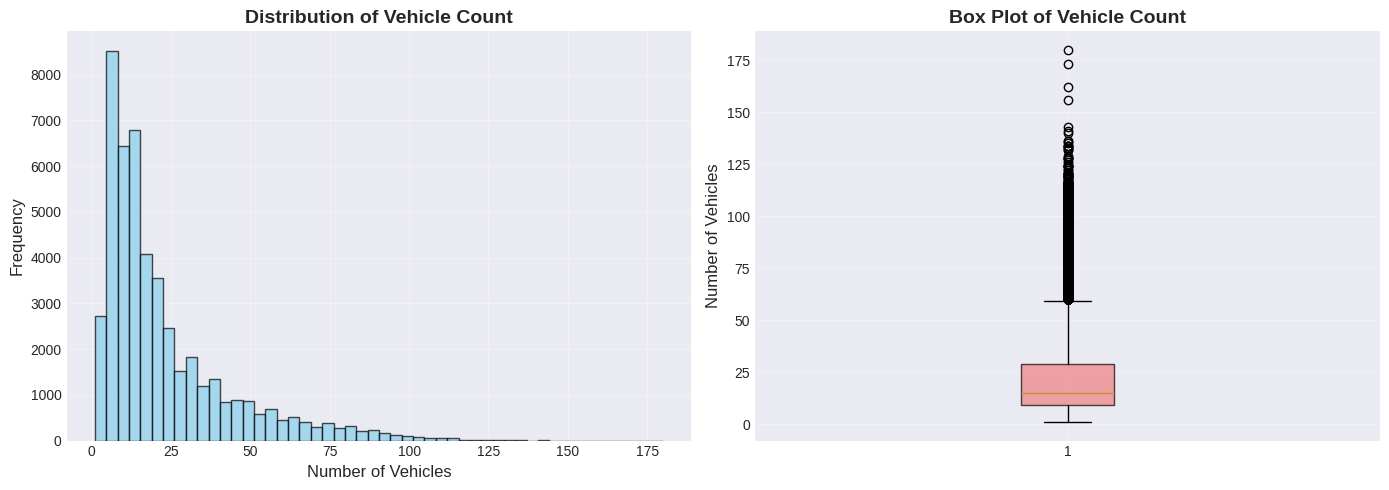


✓ Target variable (Vehicles) range: 1 to 180


In [ ]:
# %% Target Variable Analysis
print("\n" + "="*80)
print("TARGET VARIABLE ANALYSIS - Vehicles")
print("="*80)

# Statistical summary of the Vehicles column
print("Statistical summary of Vehicles:")
print(df['Vehicles'].describe())

# Let's visualize the distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df['Vehicles'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_xlabel('Number of Vehicles', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Vehicle Count', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(df['Vehicles'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[1].set_ylabel('Number of Vehicles', fontsize=12)
axes[1].set_title('Box Plot of Vehicle Count', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ Target variable (Vehicles) range: {df['Vehicles'].min()} to {df['Vehicles'].max()}")


TEMPORAL PATTERNS VISUALIZATION


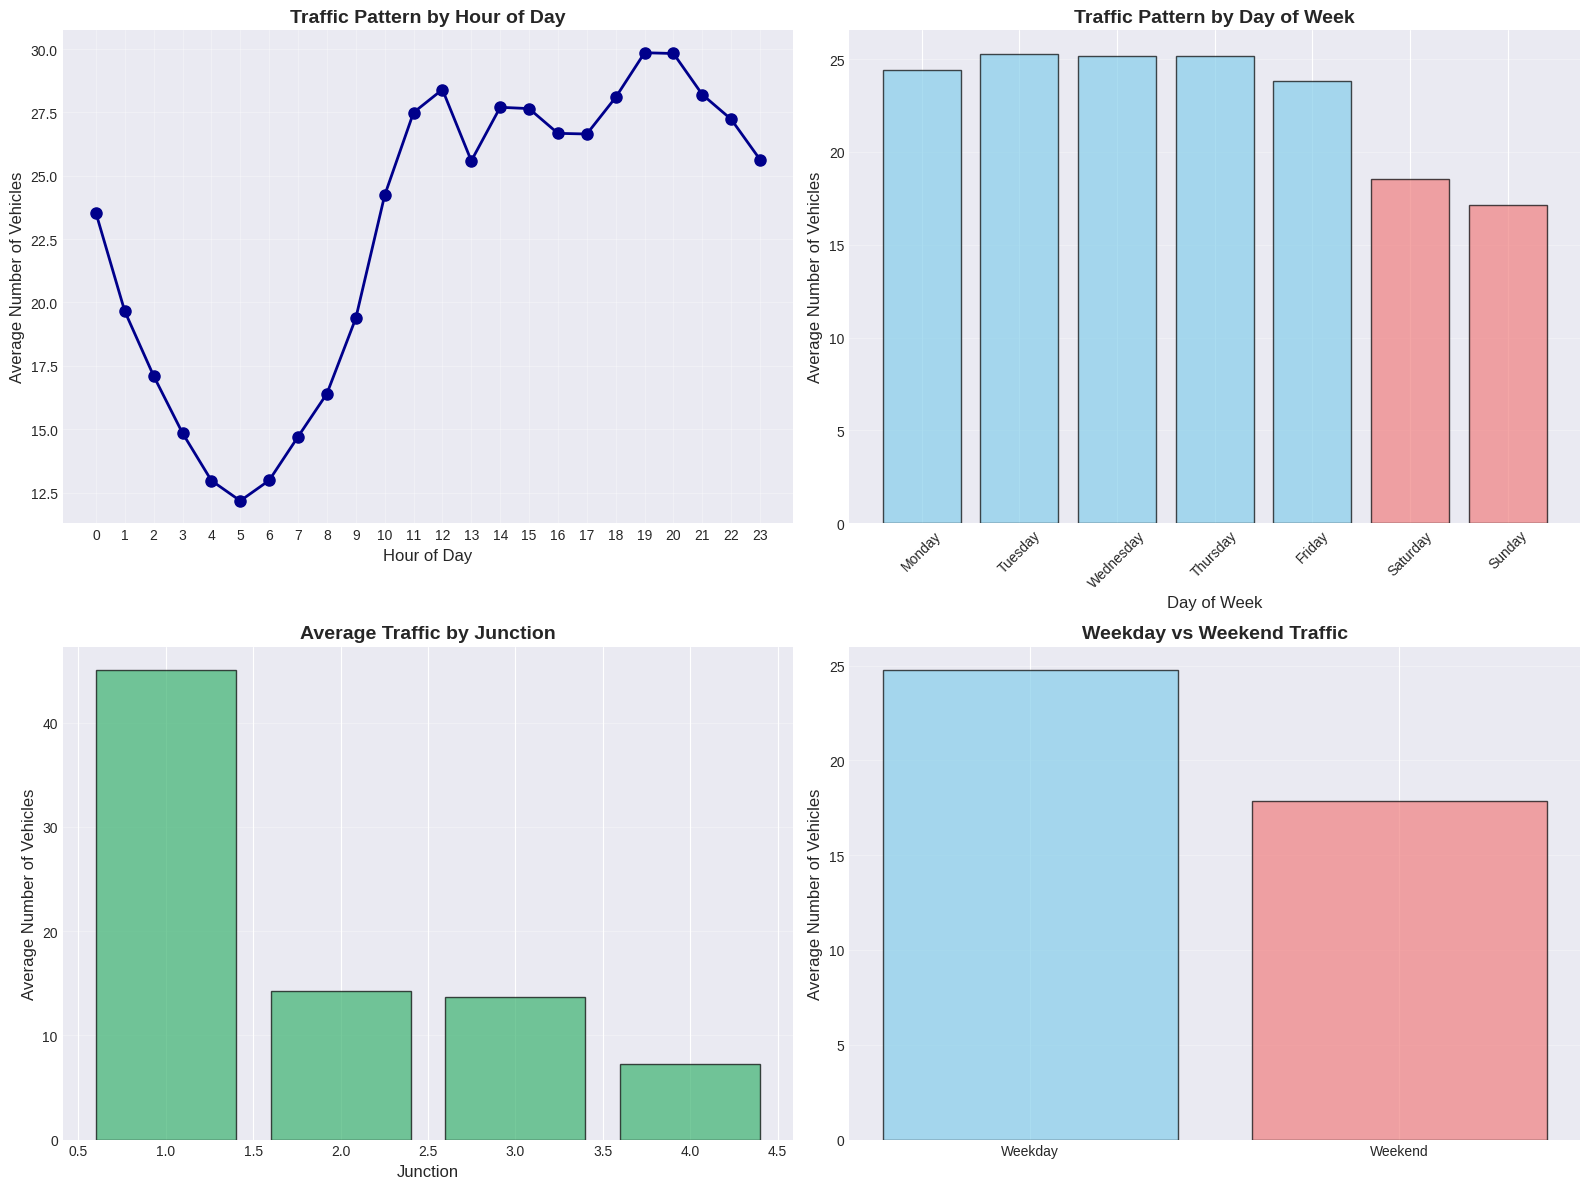

✓ Temporal patterns visualized


In [ ]:
# %% Temporal Pattern Visualization
print("\n" + "="*80)
print("TEMPORAL PATTERNS VISUALIZATION")
print("="*80)

# Average traffic by hour
hourly_traffic = df.groupby('Hour')['Vehicles'].mean().reset_index()

# Average traffic by day of the week
daily_traffic = df.groupby('DayOfWeek')['Vehicles'].mean().reset_index()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_traffic['DayName'] = daily_traffic['DayOfWeek'].map(lambda x: day_names[x])

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Hourly pattern
axes[0, 0].plot(hourly_traffic['Hour'], hourly_traffic['Vehicles'],
                marker='o', linewidth=2, markersize=8, color='darkblue')
axes[0, 0].set_xlabel('Hour of Day', fontsize=12)
axes[0, 0].set_ylabel('Average Number of Vehicles', fontsize=12)
axes[0, 0].set_title('Traffic Pattern by Hour of Day', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24))

# 2. Daily pattern
axes[0, 1].bar(daily_traffic['DayName'], daily_traffic['Vehicles'],
               color=['lightcoral' if x >= 5 else 'skyblue' for x in daily_traffic['DayOfWeek']],
               edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Day of Week', fontsize=12)
axes[0, 1].set_ylabel('Average Number of Vehicles', fontsize=12)
axes[0, 1].set_title('Traffic Pattern by Day of Week', fontsize=14, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Traffic by junction
junction_traffic = df.groupby('Junction')['Vehicles'].mean().reset_index()
axes[1, 0].bar(junction_traffic['Junction'], junction_traffic['Vehicles'],
               color='mediumseagreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Junction', fontsize=12)
axes[1, 0].set_ylabel('Average Number of Vehicles', fontsize=12)
axes[1, 0].set_title('Average Traffic by Junction', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Weekday vs weekend
weekend_traffic = df.groupby('IsWeekend')['Vehicles'].mean().reset_index()
weekend_labels = ['Weekday', 'Weekend']
axes[1, 1].bar(weekend_labels, weekend_traffic['Vehicles'],
               color=['skyblue', 'lightcoral'], edgecolor='black', alpha=0.7)
axes[1, 1].set_ylabel('Average Number of Vehicles', fontsize=12)
axes[1, 1].set_title('Weekday vs Weekend Traffic', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Temporal patterns visualized")


TRAFFIC HEATMAP - Hour vs Day of Week


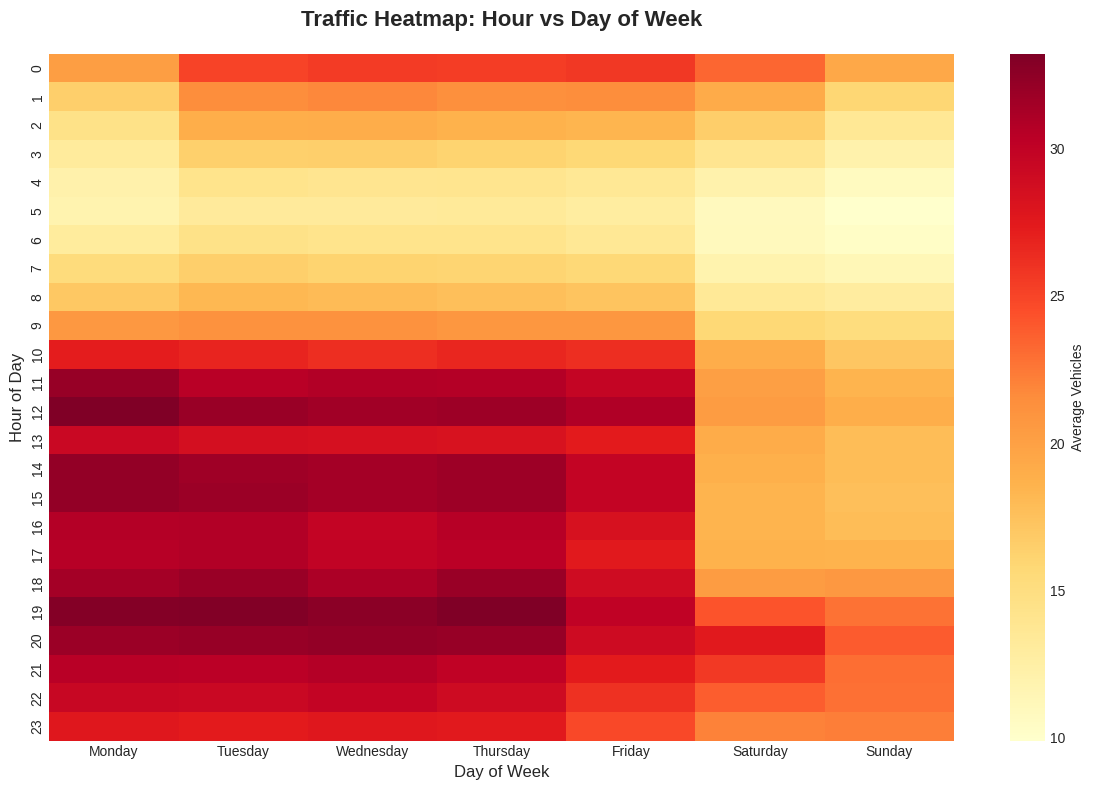

✓ Heatmap shows traffic intensity across hours and days


In [ ]:
print("\n" + "="*80)
print("TRAFFIC HEATMAP - Hour vs Day of Week")
print("="*80)

# Create pivot table for heatmap
pivot_traffic = df.pivot_table(values='Vehicles',
                                 index='Hour',
                                 columns='DayOfWeek',
                                 aggfunc='mean')

# Change column names
pivot_traffic.columns = day_names

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_traffic, annot=False, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Average Vehicles'})
plt.title('Traffic Heatmap: Hour vs Day of Week', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Day of Week', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.tight_layout()
plt.show()

print("✓ Heatmap shows traffic intensity across hours and days")


CORRELATION ANALYSIS


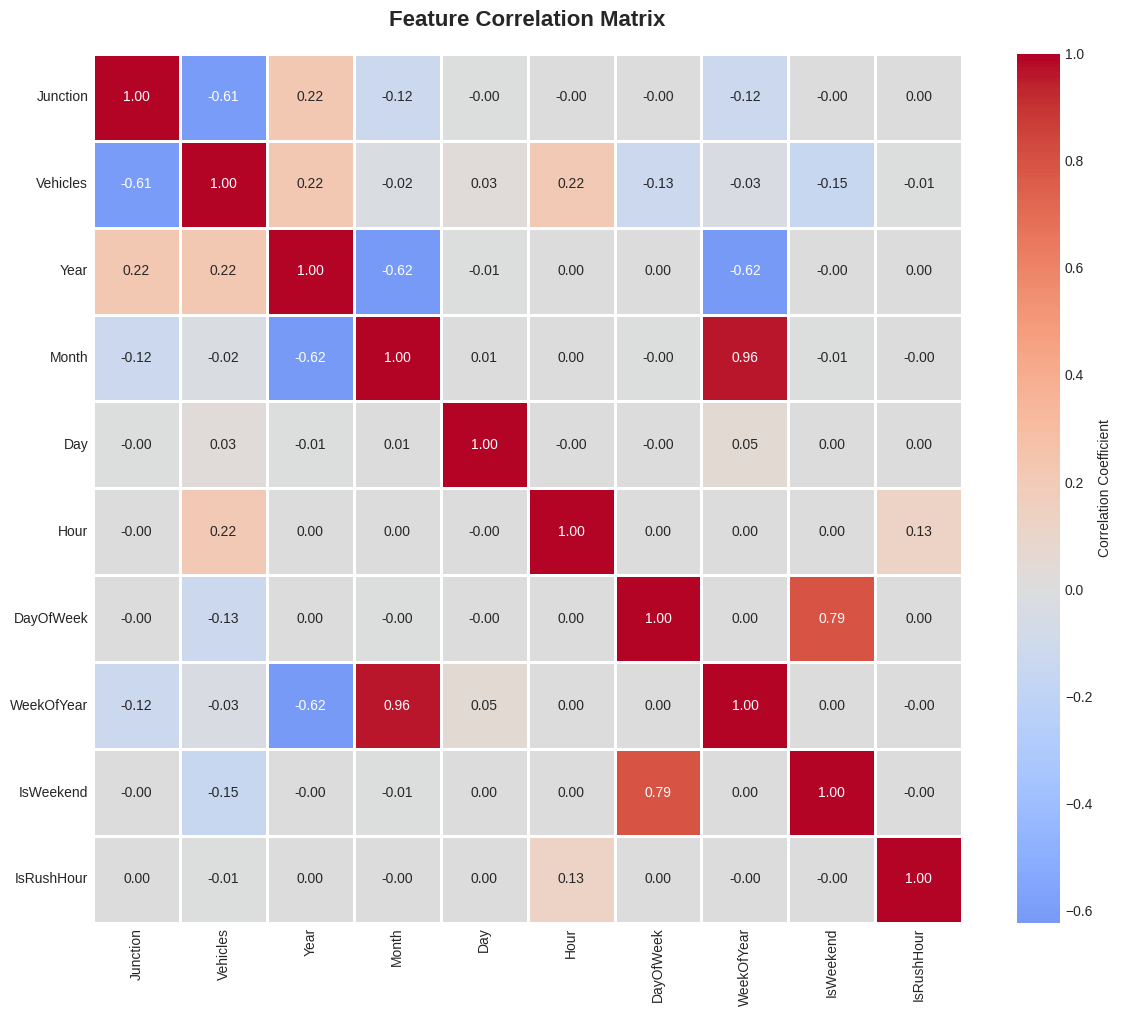


Correlation with target variable (Vehicles):
Vehicles      1.000000
Year          0.221253
Hour          0.219938
Day           0.027895
IsRushHour   -0.007715
Month        -0.022723
WeekOfYear   -0.033747
DayOfWeek    -0.126027
IsWeekend    -0.150550
Junction     -0.613787
Name: Vehicles, dtype: float64


In [ ]:
# %% Correlation Analysis
print("\n" + "="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Correlation matrix for numerical features
# Let's remove the ID column as it is meaningless
numerical_features = ['Junction', 'Vehicles', 'Year', 'Month', 'Day', 'Hour',
                      'DayOfWeek', 'WeekOfYear', 'IsWeekend', 'IsRushHour']

correlation_matrix = df[numerical_features].corr()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Features with the highest correlation to Vehicles
vehicle_corr = correlation_matrix['Vehicles'].sort_values(ascending=False)
print("\nCorrelation with target variable (Vehicles):")
print(vehicle_corr)